In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [13]:
filename = "/content/gdrive/MyDrive/python для анализа данных/train.csv"

Считайте датасет из файла train.csv (это данные о выживаемости на Титанике) - 1 балл


In [14]:
df = pd.read_csv(filename)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Визуализируйте распределение значений признаков Survived, Pclass, Age, Sex. Parch - 2 балла


Text(0.5, 0.98, 'Some distributions')

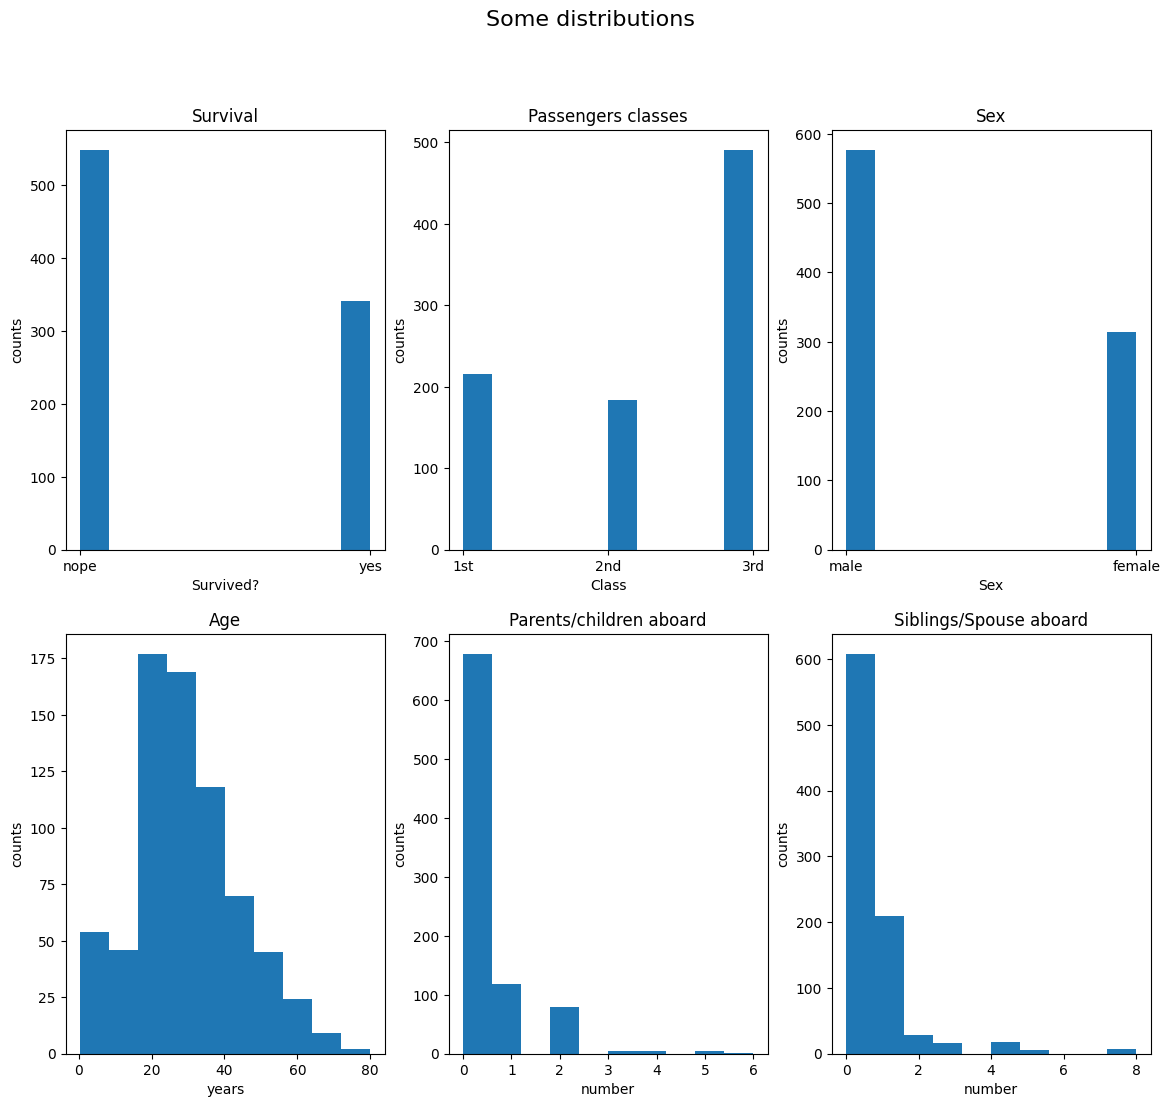

In [15]:
fig, axs = plt.subplots(2, 3, figsize=(14, 12))

axs[0, 0].hist(df["Survived"])
axs[0, 0].set_xlabel("Survived?")
axs[0, 0].set_xticks([0,1], ["nope", "yes"])
axs[0, 0].set_title("Survival")

axs[0, 1].hist(df["Pclass"] )
axs[0, 1].set_xlabel("Class")
axs[0, 1].set_xticks([1,2,3], ["1st", "2nd", "3rd"])
axs[0, 1].set_title("Passengers classes")

axs[0, 2].hist(df["Sex"] )
axs[0, 2].set_xlabel("Sex")
axs[0, 2].set_title("Sex")

axs[1, 0].hist(df["Age"] )
axs[1, 0].set_xlabel("years")
axs[1, 0].set_title("Age")

axs[1, 1].hist(df["Parch"] )
axs[1, 1].set_xlabel("number")
axs[1, 1].set_title("Parents/children aboard")

axs[1, 2].hist(df["SibSp"] )
axs[1, 2].set_xlabel("number")
axs[1, 2].set_title("Siblings/Spouse aboard")

for ax in fig.get_axes():
    ax.set_ylabel("counts")

fig.suptitle('Some distributions', fontsize=16)

Постройте график типа boxplot для столбца Age - 1 балл

*построила с помощью разных библиотек интереса ради*

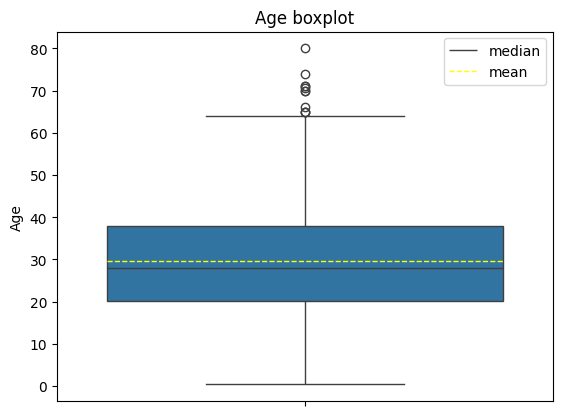

In [16]:
meanlineprops = dict(linestyle='--', color='yellow', label='mean')

s = sns.boxplot(df["Age"],  showmeans=True, meanline=True,
                meanprops = meanlineprops,
                medianprops = {"label": "median"})
s.set_title('Age boxplot')
s.legend()

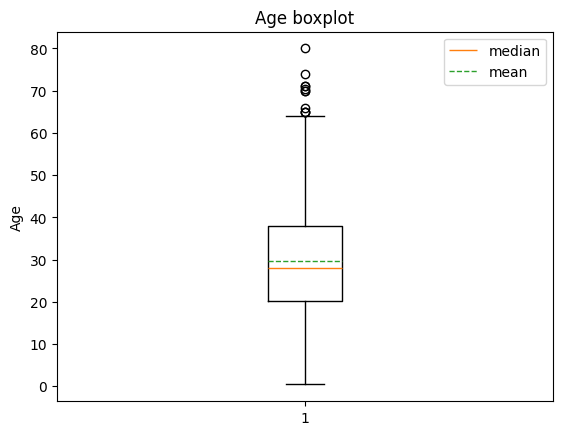

In [17]:
data = df["Age"].dropna()

fig, ax = plt.subplots()
ax.boxplot(data,
           meanline=True, showmeans=True,
           meanprops = {"label": "mean"},
           medianprops = {"label": "median"})
ax.set_ylabel("Age")
ax.set_title('Age boxplot')
ax.legend()


In [30]:
p = px.box(df["Age"], y = 'Age', points="all", title="Age boxplot")
p.update_traces(boxmean=True)

Проинтепретируйте полученный график - 1 балл

1.   Минимальное значение - менее года
2.   Первый квартиль - 20
3.   Медианное значение - 28
4. Среднее значение - 30
5. Третий квартиль - 38
6. Верхняя граница уса - 65
7. Максимальное значение - 80


*Таким образом, на борту присутствовали пассажиры с возрастом от 0 до 80 лет, причем количество пассажиров, старше 65 лет, незначительно. Основная масса пассжиров была в возрасте от 20 до 38 лет. Средний возраст составил 30 лет.*

Постройте график типа pie chart для переменных Survived, Pclass, подпишите доли в процентах - 1 балл


In [19]:
survived = df['Survived'].value_counts()
pclass = df['Pclass'].value_counts()

Text(0.5, 1.0, 'Ticket class')

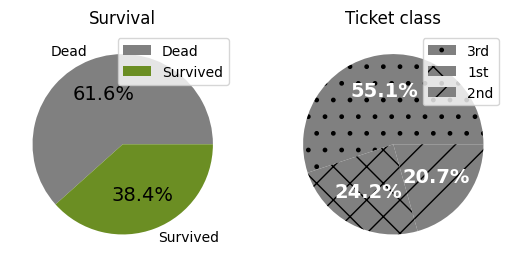

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2)

wedges1, texts1, autotexts1 = ax1.pie(survived,
                                  labels = ['Dead','Survived'],
                                  autopct = '%1.1f%%',
                                  colors=['gray', 'olivedrab'])
ax1.legend(wedges1, ['Dead','Survived'], loc='upper right')
plt.setp(autotexts1, size=14)
ax1.set_title('Survival')

wedges2, texts2, autotexts2 = ax2.pie(pclass,
                                  labels = ['3rd','1st', '2nd'],
                                  autopct = '%1.1f%%',
                                  colors=['grey'], hatch=['.', 'x', '/' ],
                                  textprops=dict(color="w")
                                  )
ax2.legend(wedges2, ['3rd','1st', '2nd'], loc='upper right')
plt.setp(autotexts2, size=14, weight="bold")
ax2.set_title('Ticket class')

Постройте график типа pairplot для всех числовых переменных датасета - 1 балл


Text(0.5, 1.05, 'Numerical values')

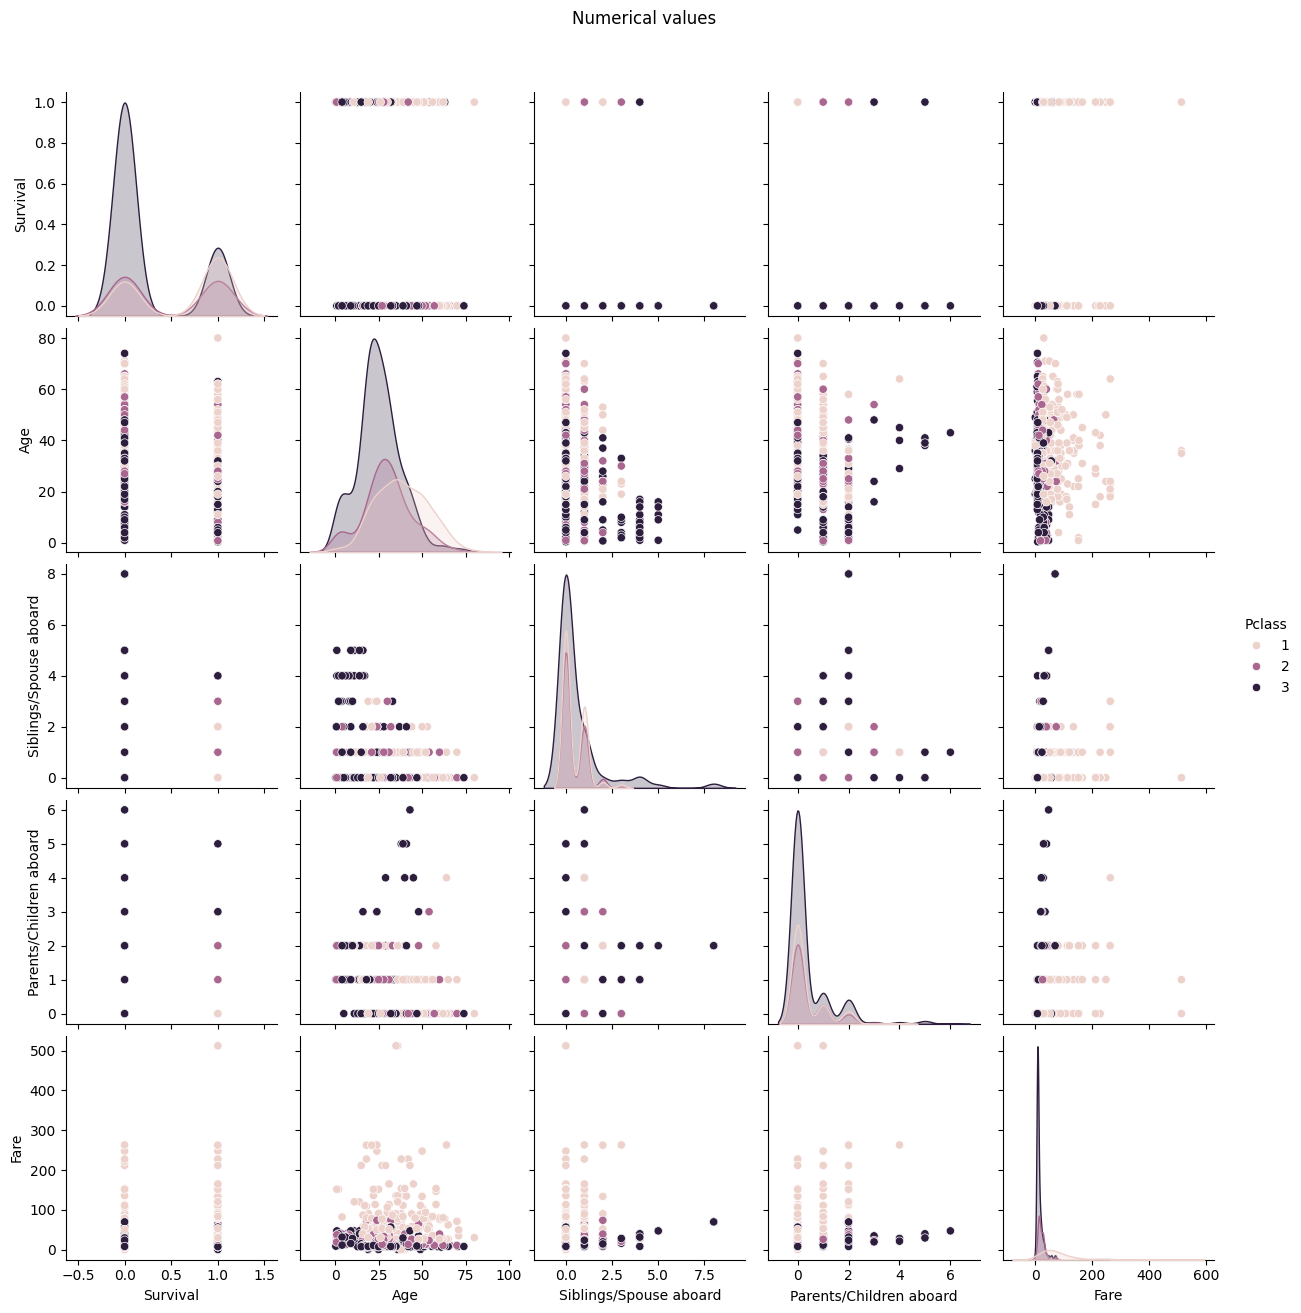

In [21]:
numeric = df[["Survived","Pclass","Age","SibSp", "Parch", "Fare"]] # не включила пассенджерс айди, поскольку в нем нет информативности

p = sns.pairplot(numeric,
                 hue="Pclass",
                 #diag_kind='hist',
                 dropna=True
                 )

labels = ["Survival", "Age", "Siblings/Spouse aboard", "Parents/Children aboard", "Fare"]
p.x_vars = labels
p.y_vars = labels
p._add_axis_labels()
p.fig.suptitle("Numerical values", y=1.05)

Постройте интерактивный sunburst plot (визуализация иерархических данных) с помощью plotly. На первом уровне иерархии - количество пассажиров в каждом из классов, а на втором количество женщин/мужчин в этом классе - 2 балла


In [22]:
passengers =  df.groupby(["Pclass", "Sex"])["Pclass"].value_counts()

df_passengers = pd.DataFrame({"Class":["1st class", "1st class", "2nd class", "2nd class", "3rd class", "3rd class"],
                              "Sex":['female', 'male', 'female', 'male', 'female', 'male'],
                              "values": passengers })

In [25]:
px.sunburst(df_passengers, path=["Class", "Sex"], values='values', title="Passengers")

Снабдите все построенные графики наименованиями (title), подписями осей, легендами - 1 балл